### Problem 1 – tf2_engineer.jpg

**Tasks:**
1. Read and display the original image in colour.
2. Find the centre of the image (𝑦𝑦𝑐𝑐, 𝑥𝑥𝑐𝑐) and print the intensity value at the centre.
3. Place a rectangular colour patch around the centre of the image. Height of the patch is 30 pixels;
width of the patch is 40 pixels. Patch Colour (in Hex): #329ea8
4. Print the intensity value at the centre of the colour patch.
5. Display the new image with colour patch.

Since OpenCV's imread() loads the image in BGR format by default we must use cvtColour() to convert it to RGB format to be able to use Matplotlib’s plt.imshow() correctly.

It's also important to note that in OpenCV the convention is (y, x) and the first index is height.

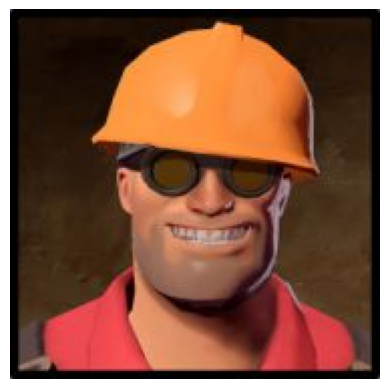

Image center is (y=92, x=92)
Center's intensity is [ 67  92 172]


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# first we read and display original image
img1 = cv2.imread("tf2_engineer.jpg")
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) #convert to RGB
plt.imshow(img1_rgb)
plt.axis("off") #to hide x y axises
plt.show()

#we can find the centre 
h, w, _ = img1.shape
yc = h // 2
xc = w // 2
print(f"Image center is (y={yc}, x={xc})")
print("Center's intensity is", img1[yc, xc])

Now we place a 40x30 patch in the middle of the image by changing the intensity values of the pixels around the image.  
To convert the hex value of the colour to BGR which is the only form cv2 accepts I used the following algorithm:  
1- loop through the hex value jumping two values at a time and taking the two-digit value as our unit for intensity value  
2- convert the 2-digit hex value taken into a decimal int with int()  
3- using tuple() we group the three outputs into a tuple which represents rgb value  
4- finally we flip the rgb value into bgr  

new intensity: [168 158  50]


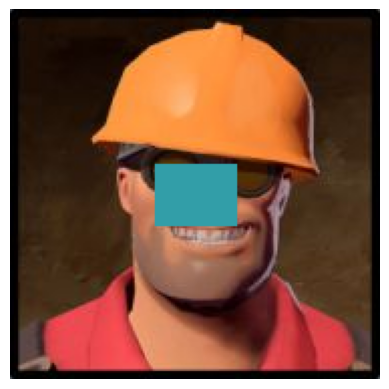

In [5]:
# Converts "#329ea8" → (R, G, B)
hex_color = "#329ea8".lstrip('#')
rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
patch_color = (rgb[2], rgb[1], rgb[0])

top_left = (xc - 20, yc - 15)
bottom_right = (xc + 20, yc + 15)
img1_patch = img1.copy()
cv2.rectangle(img1_patch, top_left, bottom_right, patch_color, -1) #-1 is thickness parameter and -1 means to fill the rectangle completely with the colour

print("new intensity:", img1_patch[yc, xc])

img1_patch_rgb = cv2.cvtColor(img1_patch, cv2.COLOR_BGR2RGB)
plt.imshow(img1_patch_rgb)
plt.axis("off")
plt.show()

## Problem 2 – einstein.tiff

Tasks:
1. Read and display the original image in grayscale.
2. Find the negative of the input image.
3. Display the negative image.
4. From the original image get the intensity value of 5 random pixels, and from the negative image
get the intensity value of same pixels. Print pixel values to show pixel values before and after.  

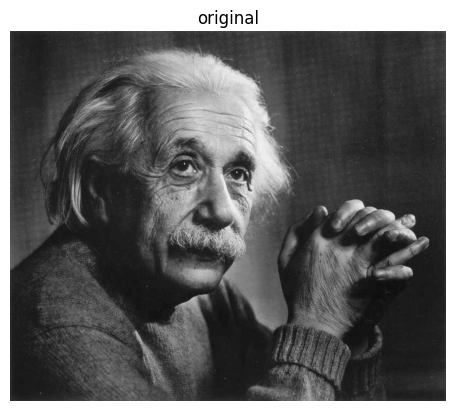

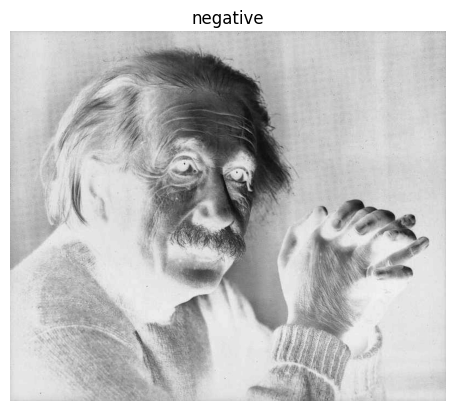

pixel at (y=37, x=235), original: 110, negative: 145
pixel at (y=72, x=767), original: 105, negative: 150
pixel at (y=645, x=144), original: 115, negative: 140
pixel at (y=129, x=583), original: 105, negative: 150
pixel at (y=508, x=390), original: 96, negative: 159


In [7]:
# read and display the grayscale of original image
img2 = cv2.imread("einstein.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')
plt.title("original")
plt.axis("off")
plt.show()

# display img negative
neg2 = 255 - img2  # get the negative of each pixel
plt.imshow(neg2, cmap='gray')
plt.title("negative")
plt.axis("off")
plt.show()

# to compare intensity values at 5 random pixels
np.random.seed(1)
coordinates2 = []
height, width = img2.shape[0], img2.shape[1]
# first we generate 5 random (y, x) coordinates
for i in range(5):
    y = np.random.randint(0, height)
    x = np.random.randint(0, width)
    coordinates2.append((y, x))

for y, x in coordinates2:
    print(f"pixel at (y={y}, x={x}), original: {img2[y, x]}, negative: {neg2[y, x]}")

### Problem 3 – pout.tiff

**Tasks:**
1. Read and display the original image in grayscale.
2. Apply log transform to original image and display the result.
3. Apply inverse log transform to original image and display the result.
4. Apply inverse log transform to image you get from step 2 and display the result.
5. Comment on the images you get from step 2 and step 4.

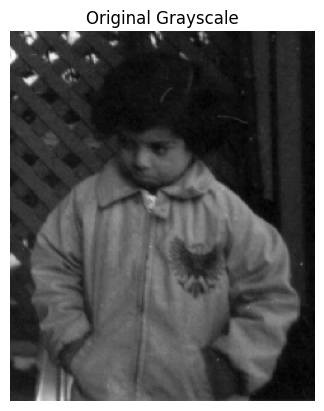

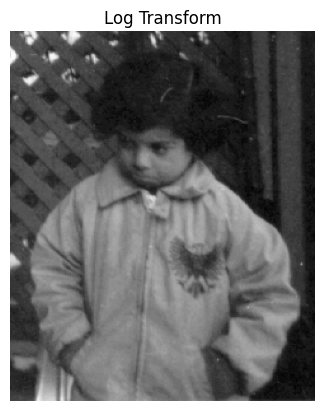

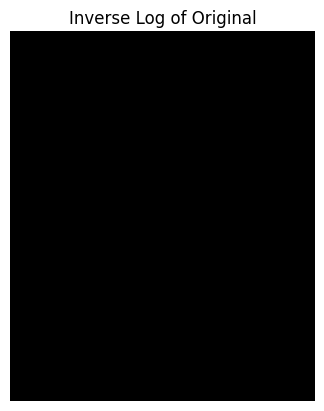

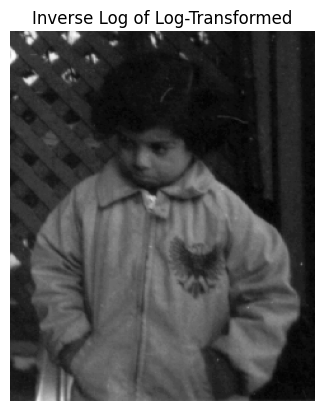

In [9]:
# Read and display grayscale image
img3 = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img3, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")
plt.show()

# Step 2
img3_float = img3.astype(np.float32)
log_transformed = np.log1p(img3_float)  # log(1 + r)

# Normalize to 0-255 for display
log_display = cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX)
log_display = log_display.astype(np.uint8)

plt.imshow(log_display, cmap='gray')
plt.title("Log Transform")
plt.axis("off")
plt.show()

# Apply inverse log transform to the original image
img3_clipped = np.clip(img3_float, 0, 20)  # Clip to prevent exp overflow
inv_log = np.expm1(img3_clipped)           # Apply inverse log
inv_log_orig_display = cv2.normalize(inv_log, None, 0, 255, cv2.NORM_MINMAX)
inv_log_orig_display = inv_log_orig_display.astype(np.uint8)

plt.imshow(inv_log_orig_display, cmap='gray')
plt.title("Inverse Log of Original")
plt.axis("off")
plt.show()

# Step 4 – inverse log of log
inv_log = np.expm1(log_transformed)

inv_log_display = cv2.normalize(inv_log, None, 0, 255, cv2.NORM_MINMAX)
inv_log_display = inv_log_display.astype(np.uint8)

plt.imshow(inv_log_display, cmap='gray')
plt.title("Inverse Log of Log-Transformed")
plt.axis("off")
plt.show()



Log transform brightens up the image. When we apply inverse log transform on the original image the outputted image is black because we aren't applying it to a log transformed image and the intensity values are not within suitable range to apply inverse log transformation. As for when we apply inverse log to a log transformed image the output is the same original image.

### Problem 4 – moon.tiff

**Tasks:**
1. Read and display the image in grayscale.
2. Apply unsharp masking in the spatial domain for 3 different `k` values.
3. Apply unsharp masking in the frequency domain for the same `k` values.
4. Display results from spatial and frequency domain side by side for comparison.

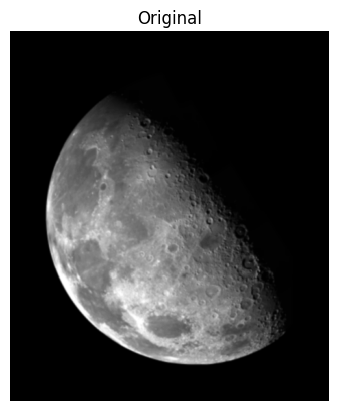

In [ ]:
# Read and display the grayscale image
img4 = cv2.imread("moon.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img4, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

# Spatial domain unsharp masking
def unsharp_spatial(image, k):
    blur = cv2.GaussianBlur(image, (9, 9), 10.0)
    mask = cv2.subtract(image, blur)
    sharpened = cv2.addWeighted(image, 1.0, mask, k, 0)
    return sharpened

k_values = [1.0, 2.0, 3.0]
spatial_results = []

for k in k_values:
    result = unsharp_spatial(img4, k)
    spatial_results.append(result)

For frequency domain unsharp masking we have to follow the steps below:
1. Computing the Fourier Transform.
2. Applying a high-pass filter (HPF).
3. Scaling the HPF result with k.
4. Adding the scaled high-pass component back to the original image.

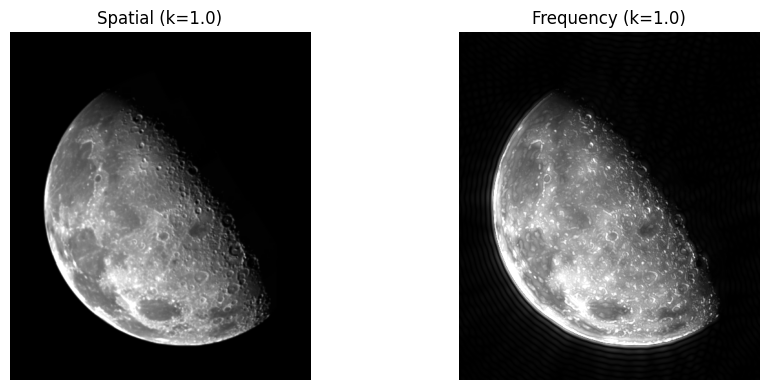

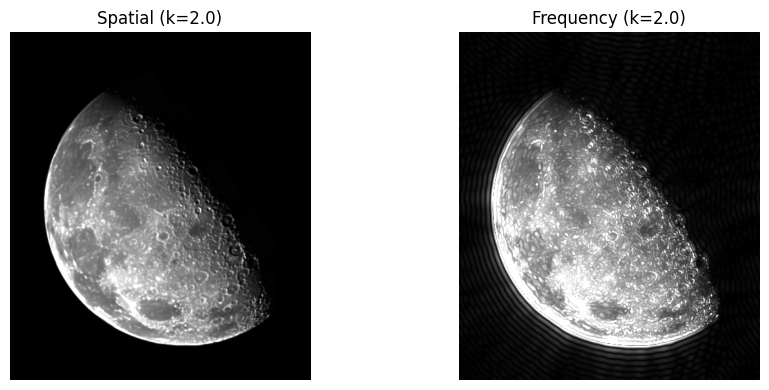

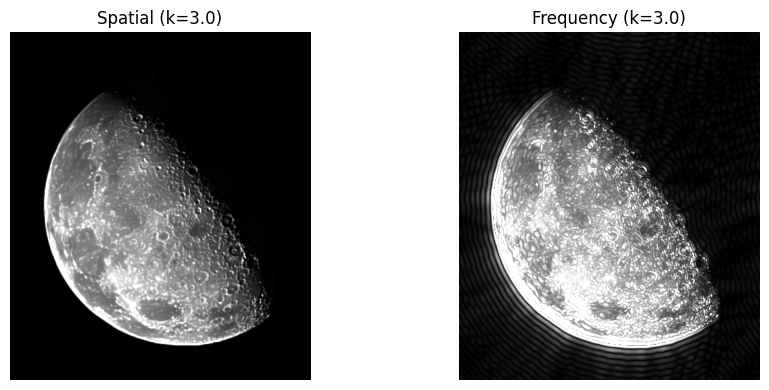

In [20]:
def unsharp_freq(image, k):
    # Convert to float32
    f = np.float32(image)
    
    # Perform DFT and shift
    dft = cv2.dft(f, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Create high-pass filter
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    mask = np.ones((rows, cols, 2), np.uint8)
    r = 30  # radius of the low-pass circle to suppress
    center = [crow, ccol]
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) < r:
                mask[i, j] = 0

    # Apply high-pass filter
    fshift = dft_shift * mask

    # Inverse DFT
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # Normalize and apply unsharp mask
    high_freq = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    sharpened = cv2.addWeighted(image.astype(np.float32), 1.0, high_freq, k, 0)
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    
    return sharpened

# Apply frequency domain unsharp masking for each k and show side-by-side with spatial
for i, k in enumerate(k_values):
    freq_result = unsharp_freq(img4, k)
    
    plt.figure(figsize=(10, 4))
    
    # Spatial result
    plt.subplot(1, 2, 1)
    plt.imshow(spatial_results[i], cmap='gray')
    plt.title(f"Spatial (k={k})")
    plt.axis("off")
    
    # Frequency result
    plt.subplot(1, 2, 2)
    plt.imshow(freq_result, cmap='gray')
    plt.title(f"Frequency (k={k})")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()


### Problem 5 – pcb.tiff

**Tasks:**
1. Read and display the original image in grayscale.
2. Comment on the problem presented at that image. While commenting on the problem, provide
proofs (numerical, visual, statistical etc.).
3. Use two independent approaches to solve the problem.
4. For each solution, display the results.
5. For each solution, justify your answer by providing proofs (numerical, visual, statistical etc.).

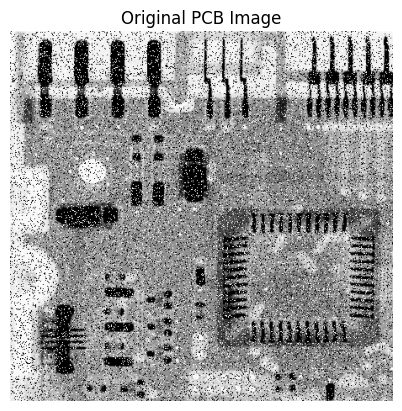

In [12]:
# Read and display grayscale image
img5 = cv2.imread("pcb.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img5, cmap='gray')
plt.title("Original PCB Image")
plt.axis("off")
plt.show()

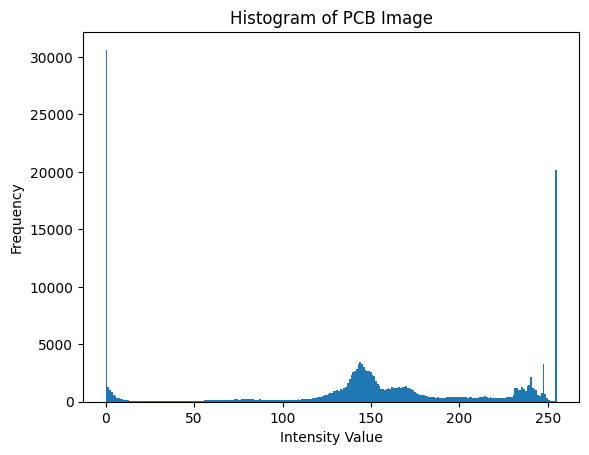

In [13]:
# Inspect histogram to identify noise
plt.hist(img5.ravel(), bins=256)
plt.title("Histogram of PCB Image")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.show()

#### Comment:
We can see that the amount of pixels with intensity values 0 and 255 are abnormally high while the middle is normal indicating presence of salt and pepper noise

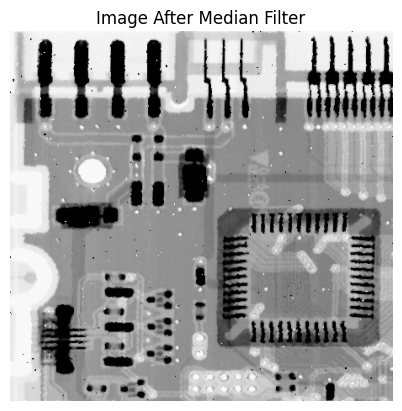

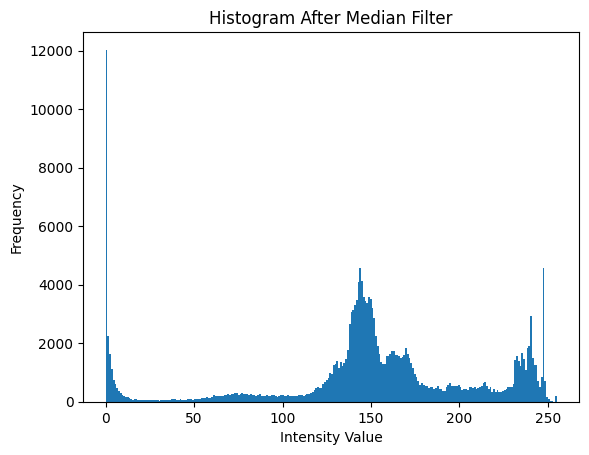

In [22]:
# we apply median filtering (which is best for salt-and-pepper noise)
fixed = cv2.medianBlur(img5, 3)

plt.imshow(fixed, cmap='gray')
plt.title("Image After Median Filter")
plt.axis("off")
plt.show()

plt.hist(fixed.ravel(), bins=256)
plt.title("Histogram After Median Filter")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.show()

We can see that the number of 0 and 255 intensity pixels has been reduced for statistical proof and visually the salt and pepper noise is gone. We'll use Gaussian blur for the second approach.

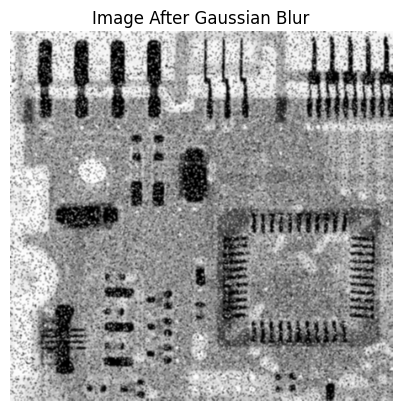

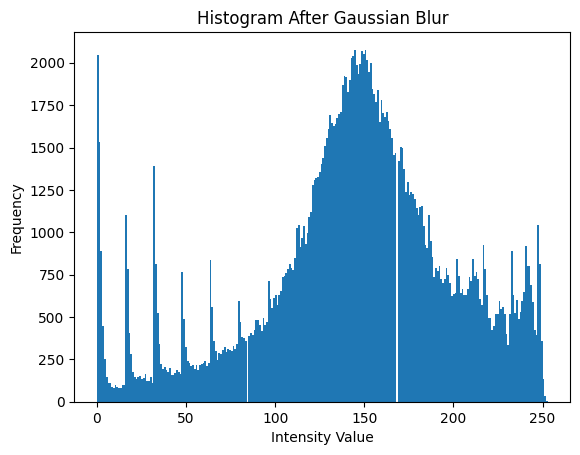

In [23]:
gaussian_filtered = cv2.GaussianBlur(img5, (3, 3), 0)

plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Image After Gaussian Blur")
plt.axis("off")
plt.show()

# Histogram
plt.hist(gaussian_filtered.ravel(), bins=256)
plt.title("Histogram After Gaussian Blur")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.show()


The histogram shows us that the extreme intensity values numbers are within expected range and we can see reduced noise. While Gaussian blur does help with salt n pepper noise it is less targeted than the median filter and can blur edges.

### Problem 6 – pollen.tiff

**Tasks:**
1. Read and display the original image in grayscale.
2. Comment on the problem presented at that image. While commenting on the problem, provide
proofs (numerical, visual, statistical etc.).
3. Use two independent approaches to solve the problem.
4. For each solution, display the results.
5. For each solution, justify your answer by providing proofs (numerical, visual, statistical etc.).

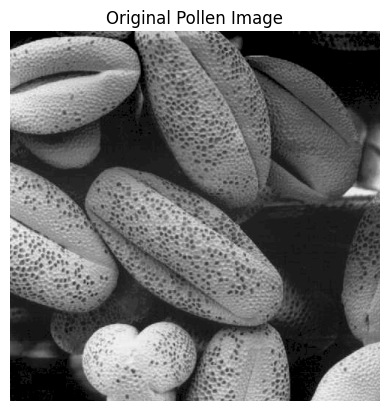

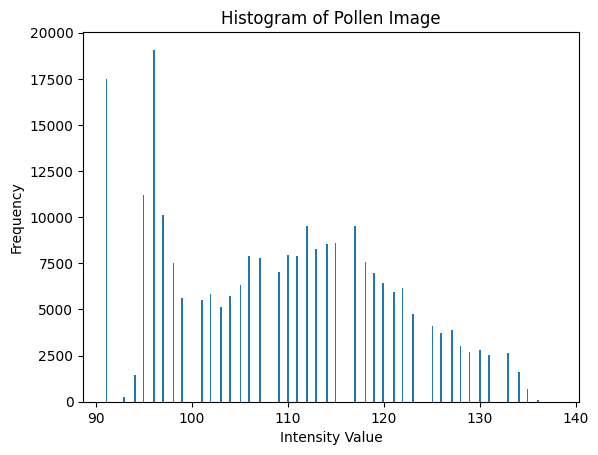

In [15]:
# Read and display grayscale image
img6 = cv2.imread("pollen.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img6, cmap='gray')
plt.title("Original Pollen Image")
plt.axis("off")
plt.show()

# Histogram inspection
plt.hist(img6.ravel(), bins=256)
plt.title("Histogram of Pollen Image")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.show()

#### Comment:
The histogram is skewed left especially between intensity 90-100, indicating that the image is too dark and has poor contrast, and the range for intensity is too small (90-140). The image is unclear and dark.

Histogram Equalisation Approach

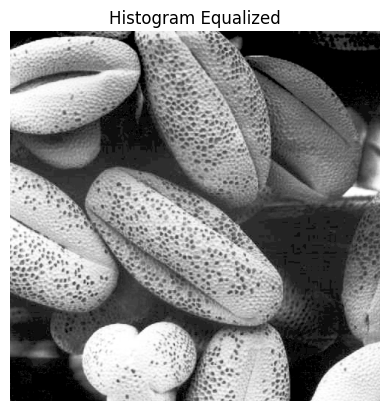

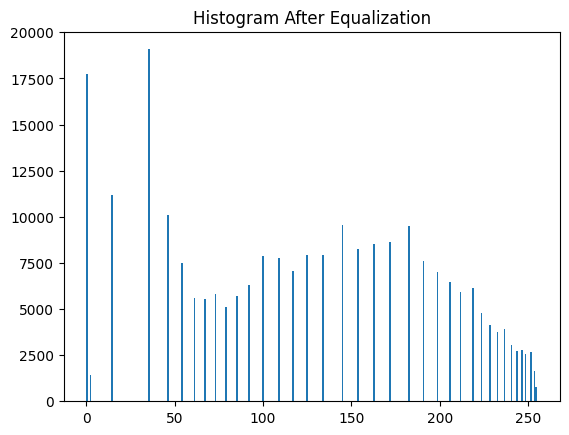

In [16]:
# Apply histogram equalization
eq_img6 = cv2.equalizeHist(img6)

plt.imshow(eq_img6, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()

plt.hist(eq_img6.ravel(), bins=256)
plt.title("Histogram After Equalization")
plt.show()

Log Transformation Approach

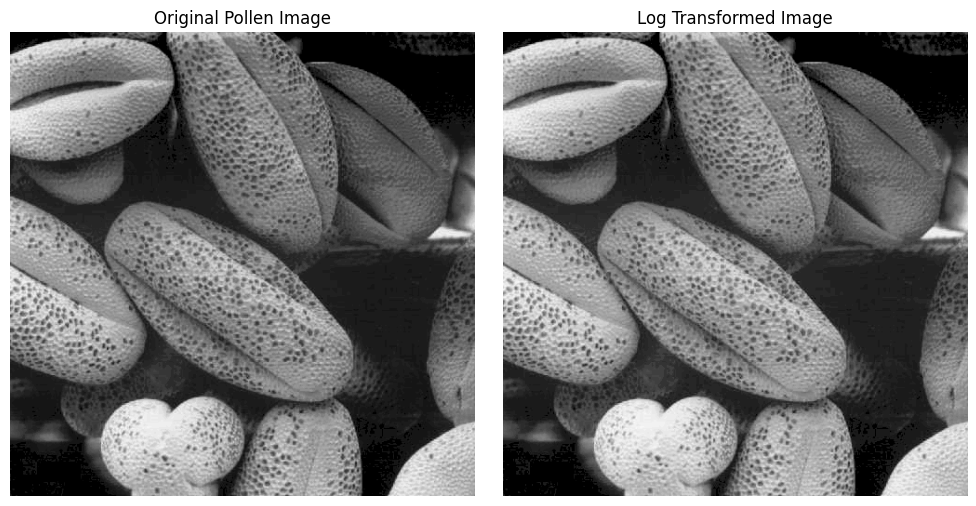

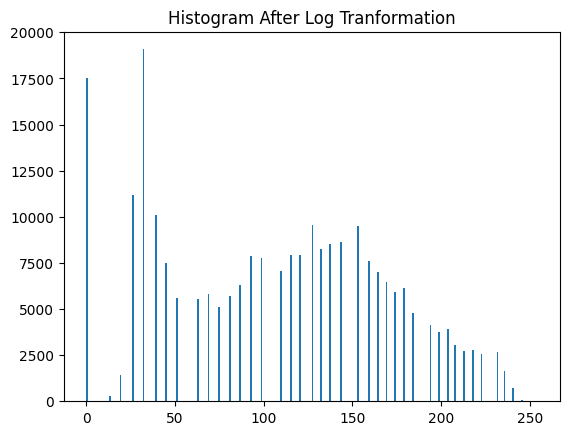

In [17]:
# 2. Apply log transformation
img_float = img6.astype(np.float32)  # Convert to float to avoid overflow
c = 255 / np.log(1 + np.max(img_float))  # Scaling constant
log_transformed = c * np.log(1 + img_float)

# 3. Normalize and convert for display
log_display = cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX)
log_display = log_display.astype(np.uint8)

# 4. Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img6, cmap='gray')
plt.title("Original Pollen Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(log_display, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")

plt.tight_layout()
plt.show()

plt.hist(log_display.ravel(), bins=256)
plt.title("Histogram After Log Tranformation")
plt.show()

- Histogram Equalization improves global contrast but over-enhances some regions.
- Log transformation provides more balanced enhancement by working on image tiles.
- Both methods increase the dynamic range of pixel intensities and make details clearer.